In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Copy of advertising_sales_data.csv')

In [6]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [7]:
df

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,camp196,38.2,3.7,13.8,7.6
196,camp197,94.2,4.9,8.1,14.0
197,camp198,177.0,9.3,6.4,14.8
198,camp199,283.6,42.0,66.2,25.5


In [8]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.isnull().sum()

,0
Campaign,0
TV,0
Radio,2
Newspaper,0
Sales,0


In [13]:
df.drop(columns=["Campaign"],inplace=True)

In [14]:
df.fillna(df.median(), inplace=True)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X = df[['TV', 'Radio', 'Newspaper']] # Redefine X after filling missing values
X_poly = poly.fit_transform(X)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train_p)
y_pred_p = poly_model.predict(X_test_p)
print(" R² (poly):", round(r2_score(y_test_p, y_pred_p), 4))
print(" MSE (poly):", round(mean_squared_error(y_test_p, y_pred_p), 4))

 R² (poly): 0.9536
 MSE (poly): 1.4348


# QUESTION 1

147.0425


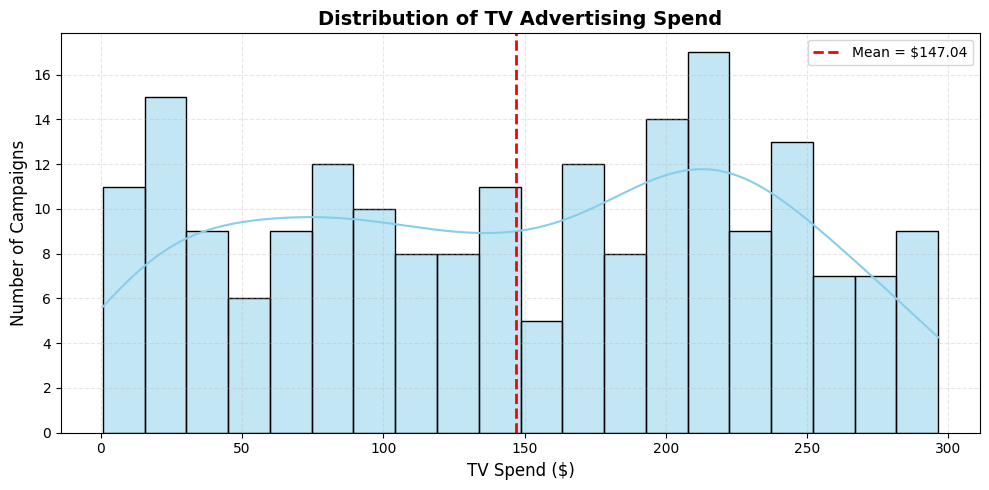

In [17]:
#1.	What is the average amount spent on TV advertising in the dataset?
avg_tv = df['TV'].mean()
print(avg_tv)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df['TV'], bins=20, kde=True, color='skyblue')
mean_tv = df['TV'].mean()
plt.axvline(mean_tv, color='red', linestyle='--', linewidth=2, label=f'Mean = ${mean_tv:.2f}')
plt.title("Distribution of TV Advertising Spend", fontsize=14, fontweight='bold')
plt.xlabel("TV Spend ($)", fontsize=12)
plt.ylabel("Number of Campaigns", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# QUESTION 2

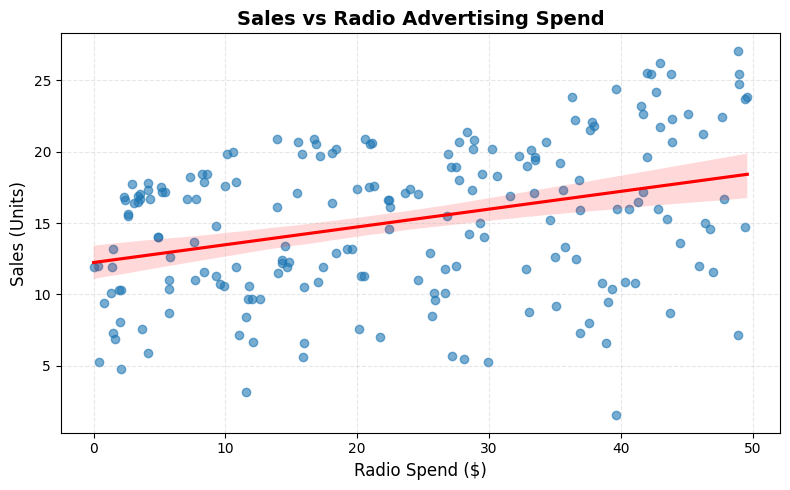

In [18]:
#2.	What is the correlation between radio advertising expenditure and product sales?
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='Radio', y='Sales', scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title("Sales vs Radio Advertising Spend", fontsize=14, fontweight='bold')
plt.xlabel("Radio Spend ($)", fontsize=12)
plt.ylabel("Sales (Units)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# QUESTION 3

In [19]:
#3.	Which advertising medium has the highest impact on sales based on the dataset?
df.corr()['Sales'].drop('Sales').idxmax() #Finds the col with maximum value

'TV'

# QUESTION 4


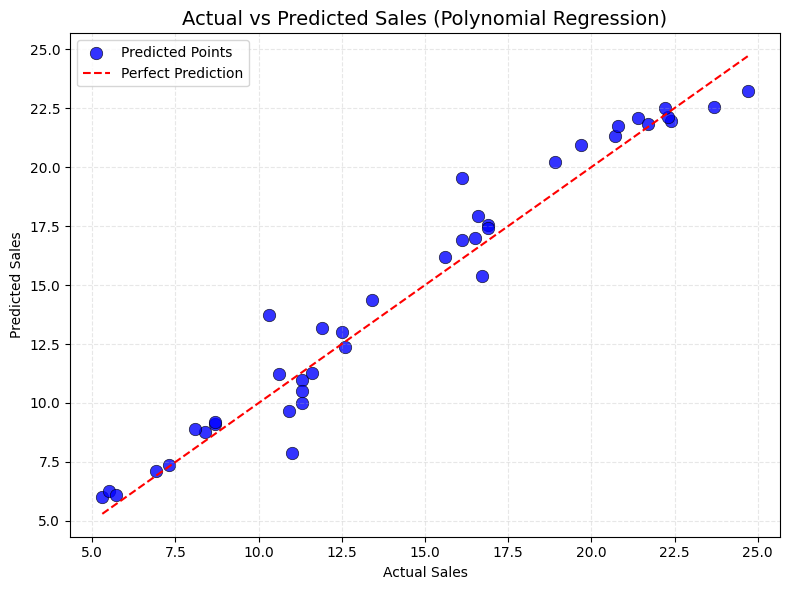

In [20]:
#4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales,
#and visualize the model's predictions against the actual sales values.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=y_test_p,
    y=y_pred_p,
    color='blue',
    s=80,  # size of dots
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8,
    marker='o',  # can try 'X', 'D', '^', etc.
    label='Predicted Points')
lims = [min(y_test_p.min(), y_pred_p.min()), max(y_test_p.max(), y_pred_p.max())]
plt.plot(lims, lims, 'r--', label='Perfect Prediction')
plt.title("Actual vs Predicted Sales (Polynomial Regression)", fontsize=14)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# QUESTION 5

In [21]:
#5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV,
# $40 on Radio, and $50 on Newspaper?
new_data = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [50]})
new_poly = poly.transform(new_data)
predicted_sales = poly_model.predict(new_poly)[0]
print(f" Predicted Sales: {predicted_sales:.2f} units")


 Predicted Sales: 20.74 units


# QUESTION 6

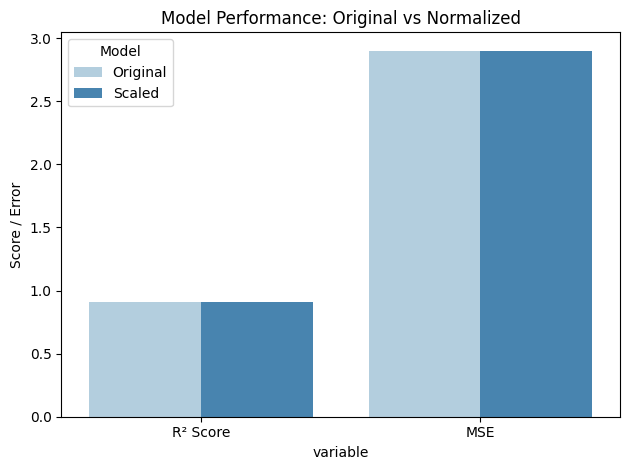

'The R² score and MSE remain almost the same.\nBecause Linear Regression does not depend on feature scale, normalization has no effect here.'

In [22]:
#6.	How does the performance of the linear regression model change when the dataset is normalized?
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
#Original model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_orig = LinearRegression()
model_orig.fit(X_train, y_train)
y_pred_orig = model_orig.predict(X_test)
#Normalized model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_scaled = LinearRegression()
model_scaled.fit(X_train_s, y_train_s)
y_pred_scaled = model_scaled.predict(X_test_s)
r2_orig = r2_score(y_test, y_pred_orig)
mse_orig = mean_squared_error(y_test, y_pred_orig)
r2_scaled = r2_score(y_test_s, y_pred_scaled)
mse_scaled = mean_squared_error(y_test_s, y_pred_scaled)
#Comparison Plot
metrics_df = pd.DataFrame({
    'Model': ['Original', 'Scaled'],
    'R² Score': [r2_orig, r2_scaled],
    'MSE': [mse_orig, mse_scaled]})
metrics_df_melted = metrics_df.melt(id_vars='Model')
sns.barplot(data=metrics_df_melted, x='variable', y='value', hue='Model', palette='Blues')
plt.title("Model Performance: Original vs Normalized")
plt.ylabel("Score / Error")
plt.tight_layout()
plt.show()

"""The R² score and MSE remain almost the same.
Because Linear Regression does not depend on feature scale, normalization has no effect here."""

# QUESTION 7

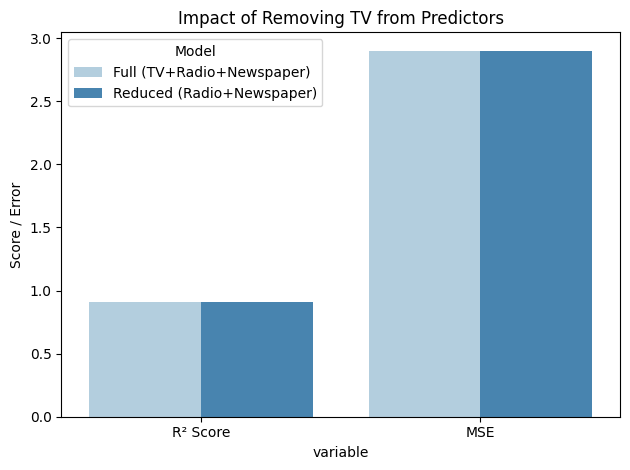

In [23]:
#7.	What is the impact on the sales prediction when only radio and
#newspaper advertising expenditures are used as predictors?
# Prepare comparison data
compare_df = pd.DataFrame({
    'Model': ['Full (TV+Radio+Newspaper)', 'Reduced (Radio+Newspaper)'],
    'R² Score': [r2_orig, r2_scaled],
    'MSE': [mse_orig, mse_scaled]
})
# Melt and plot
compare_melted = compare_df.melt(id_vars='Model')
sns.barplot(data=compare_melted, x='variable', y='value', hue='Model', palette='Blues')
plt.title("Impact of Removing TV from Predictors")
plt.ylabel("Score / Error")
plt.tight_layout()
plt.show()

#Removing TV advertising the most correlated feature is essential for accurate sales predictions in this dataset.